___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-3 (RNN)<br><br>Product Amount Forecast by Time<br><h1>

# Dataset Info

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Indest Data

In [3]:
df = pd.read_csv('Frozen_Dessert_Production.csv', index_col='DATE', parse_dates=True)
df

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [4]:
df['IPN31152N']=df['Production']
df

KeyError: 'Production'

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [10]:
df.describe()

,IPN31152N
count,573.000
mean,109.896
std,27.951
min,58.660
25%,88.936
50%,107.643
75%,128.278
max,196.174


In [5]:
df.columns = ['Production']
df

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


<AxesSubplot:xlabel='DATE'>

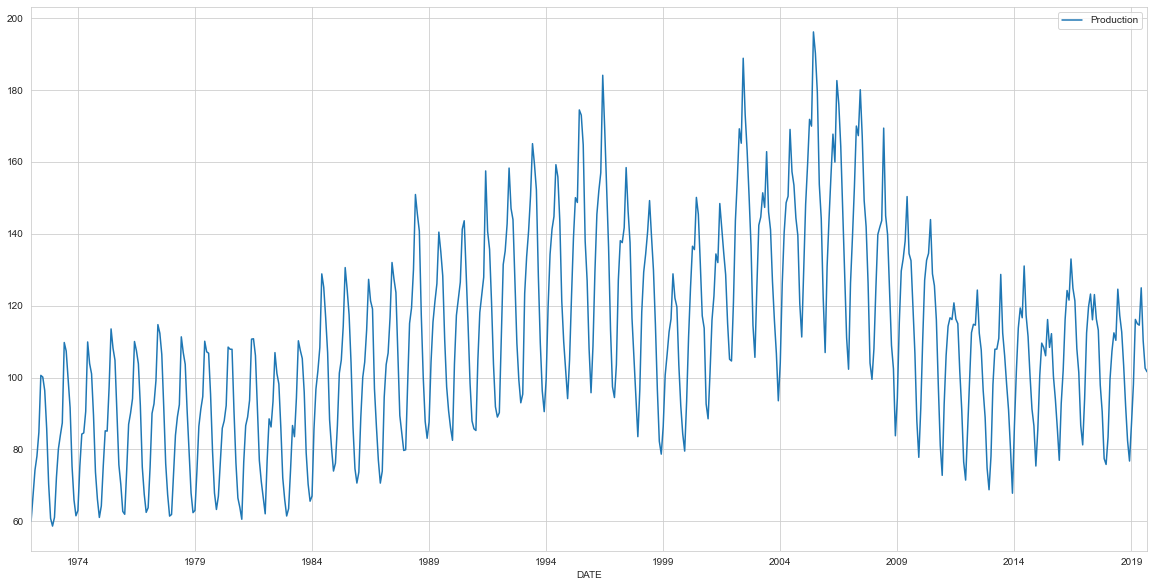

In [14]:
df.plot(figsize=(20,10))


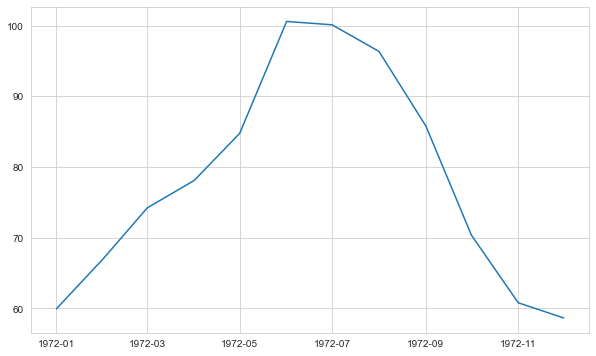

In [31]:
plt.plot(df.index[:12],df.Production[:12])

# Preprocessing of Data

## Train Test Split

In [6]:
test_size=60

In [7]:
test_ind=len(df)-test_size

In [8]:
train=df.iloc[:test_ind]
test=df.iloc[test_ind:]

## Scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()

train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [11]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [12]:
length = 12
batch_size = 2
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)

In [13]:
generator[0]

X, y = generator[0]

# Modelling & Model Performance

## with "tanh" activation function

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [15]:
train_scaled.shape

n_features = train_scaled.shape[1]

In [19]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features))) 
model.add(LSTM(50, activation = 'tanh'))                                        
                                                                                
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [21]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 3,restore_best_weights = True)

In [27]:
model.fit(x = generator,
          epochs = 100,
          validation_data = validation_generator,
         callbacks = [early_stop])

Epoch 1/100
251/251 [==============================] - 2s 8ms/step - loss: 0.0017 - val_loss: 0.0023
Epoch 2/100
251/251 [==============================] - 2s 8ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 3/100
251/251 [==============================] - 2s 8ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 4/100
251/251 [==============================] - 2s 8ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 5/100
251/251 [==============================] - 2s 9ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 6/100
251/251 [==============================] - 2s 9ms/step - loss: 0.0017 - val_loss: 0.0016


<AxesSubplot:>

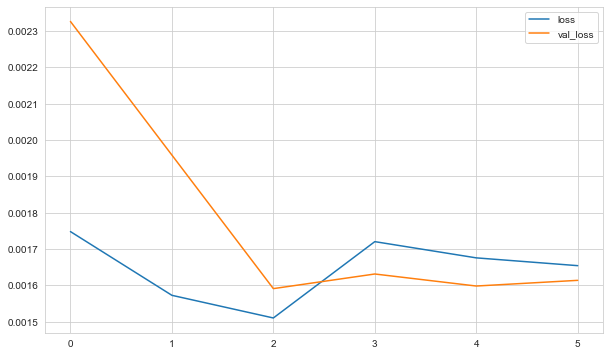

In [28]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### Evaluation on Test Data

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [30]:
predictions_scaled = []
first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))
for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

1/1 [==============================] - 0s 19ms/step


In [31]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.3430349534415785 
mae: 0.058478668963011814 
mse: 0.005064882333628444 
rmse: 0.0711679867189486


### Inverse Transformation and Comparing

In [32]:
predictions = scaler.inverse_transform(predictions_scaled)

In [37]:
compare = test[:12]
compare

,Production
DATE,
2014-10-01,91.261
2014-11-01,86.572
2014-12-01,75.375
2015-01-01,85.577
2015-02-01,100.558
2015-03-01,109.579
2015-04-01,108.362
2015-05-01,106.058
2015-06-01,116.138


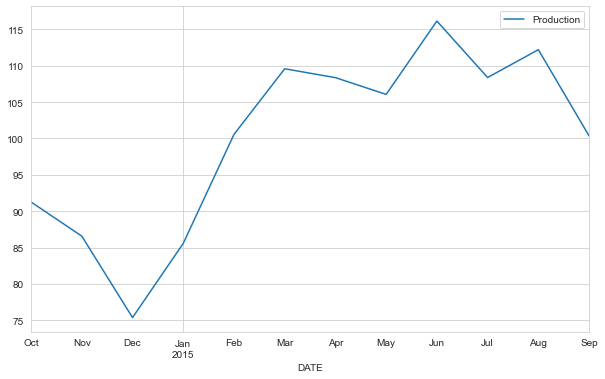

In [38]:
compare.plot();

In [43]:
compare['predictions'] = predictions

In [44]:
eval_metrics(compare.Production, compare.predictions)

r2_score: 0.3430349534415791 
mae: 8.041629835912708 
mse: 95.77729311146895 
rmse: 9.786587408870824


## with "relu" activation function

In [68]:
model2 = Sequential()
model2.add(LSTM(100, activation = 'relu', input_shape = (length, n_features)))                                        
                                                                                
model2.add(Dense(1))
model2.compile(optimizer = 'adam', loss = 'mse')

In [69]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100)               40800     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [70]:
model2.fit(x = generator,
          epochs = 100,
          validation_data = validation_generator,
          callbacks=[early_stop])

Epoch 1/100
251/251 [==============================] - 2s 5ms/step - loss: 0.0375 - val_loss: 0.0083
Epoch 2/100
251/251 [==============================] - 1s 4ms/step - loss: 0.0121 - val_loss: 0.0052
Epoch 3/100
251/251 [==============================] - 1s 5ms/step - loss: 0.0113 - val_loss: 0.0043
Epoch 4/100
251/251 [==============================] - 1s 4ms/step - loss: 0.0062 - val_loss: 0.0032
Epoch 5/100
251/251 [==============================] - 1s 4ms/step - loss: 0.0050 - val_loss: 0.0029
Epoch 6/100
251/251 [==============================] - 1s 5ms/step - loss: 0.0048 - val_loss: 0.0027
Epoch 7/100
251/251 [==============================] - 1s 5ms/step - loss: 0.0041 - val_loss: 0.0051
Epoch 8/100
251/251 [==============================] - 1s 4ms/step - loss: 0.0039 - val_loss: 0.0030
Epoch 9/100
251/251 [==============================] - 1s 5ms/step - loss: 0.0040 - val_loss: 0.0025
Epoch 10/100
251/251 [==============================] - 1s 5ms/step - loss: 0.0035 - val_lo

<AxesSubplot:>

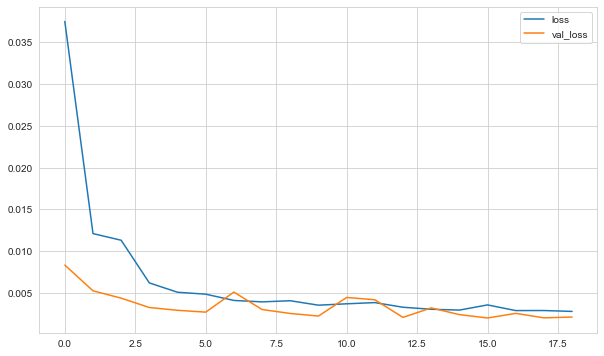

In [71]:
loss_df = pd.DataFrame(model2.history.history)
loss_df.plot()

### Evaluation on Test Data

In [73]:
predictions_scaled = []
first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))
for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model2.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)
    

eval_metrics(test_scaled[:length], predictions_scaled)

1/1 [==============================] - 0s 21ms/step
r2_score: 0.2806381053079796 
mae: 0.05705926819753687 
mse: 0.005545931813264433 
rmse: 0.07447101324182741


### Inverse Transformation and Comparing

In [74]:
predictions2 = scaler.inverse_transform(predictions_scaled)

In [75]:
compare2 = test[:12]
compare2

,Production
DATE,
2014-10-01,91.261
2014-11-01,86.572
2014-12-01,75.375
2015-01-01,85.577
2015-02-01,100.558
2015-03-01,109.579
2015-04-01,108.362
2015-05-01,106.058
2015-06-01,116.138


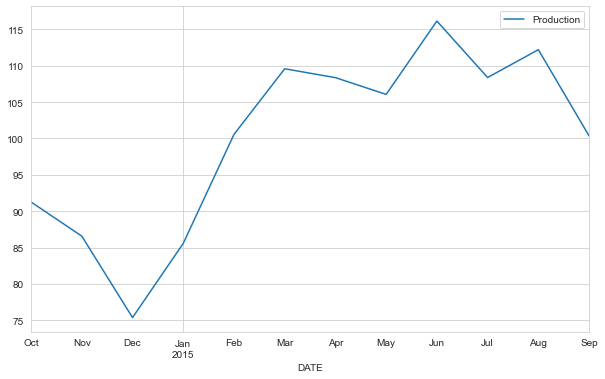

In [76]:
compare2.plot();

# Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [77]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [78]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [79]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

1/1 [==============================] - 0s 19ms/step


In [80]:
forecast = scaler.inverse_transform(forecast)

In [81]:
forecast

array([[ 90.22511838],
       [ 81.96826374],
       [ 84.0044711 ],
       [ 93.66291137],
       [105.28264943],
       [113.13743047],
       [118.18358548],
       [125.19537626],
       [125.86683085],
       [118.29958598],
       [106.96993728],
       [ 93.61751524]])

In [82]:
df

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [85]:
forecast_index = pd.date_range(start = '2019-10-01', periods = length, freq = 'MS')
forecast

array([[ 90.22511838],
       [ 81.96826374],
       [ 84.0044711 ],
       [ 93.66291137],
       [105.28264943],
       [113.13743047],
       [118.18358548],
       [125.19537626],
       [125.86683085],
       [118.29958598],
       [106.96993728],
       [ 93.61751524]])

In [87]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

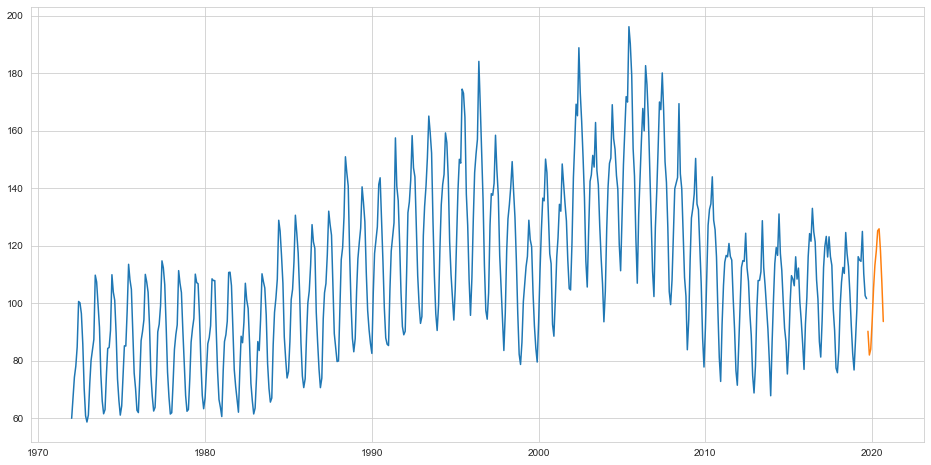

In [88]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['Production'])
plt.plot(forecast_df.index, forecast_df['Forecast'])

In [ ]:
#join dataframes

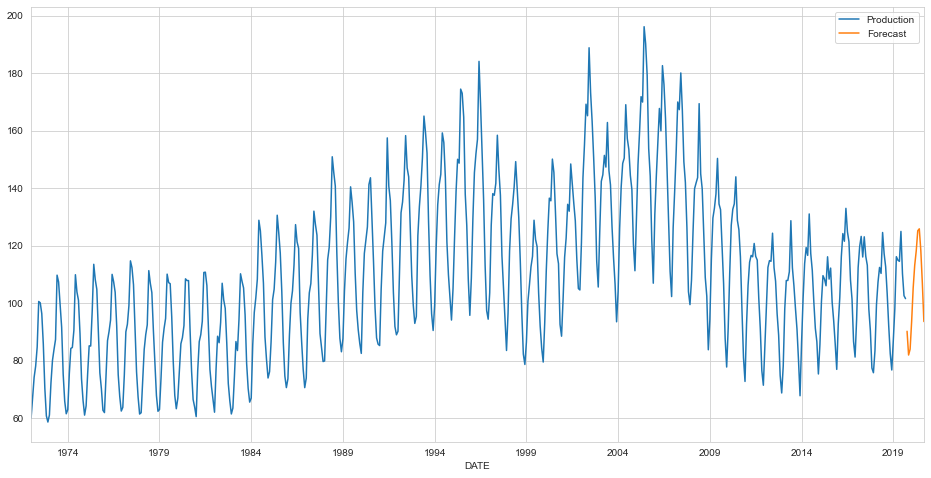

In [89]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(576.0, 611.0)

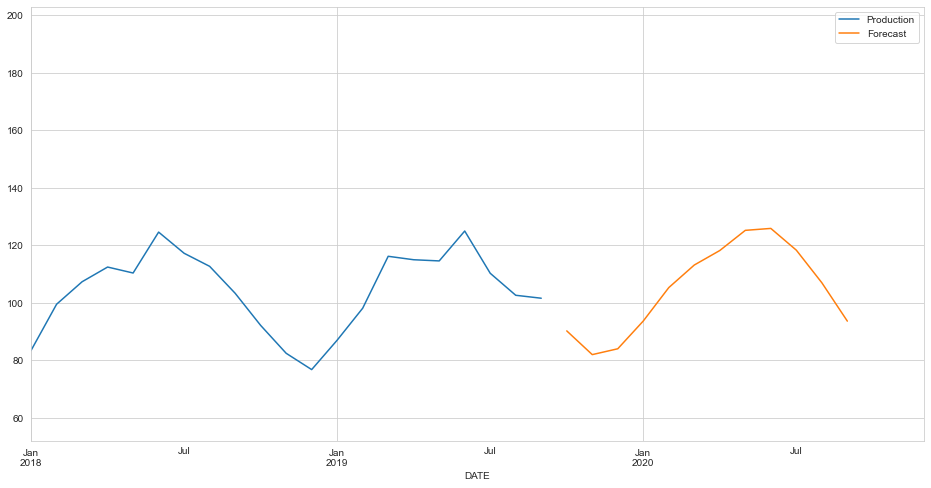

In [90]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2020-12-01')

In [91]:
dataset_total = pd.concat((df['Production'], forecast_df['Forecast']), axis=0)

<AxesSubplot:>

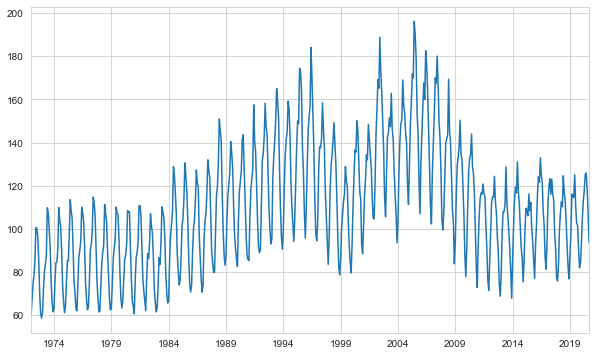

In [92]:
dataset_total.plot()


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___